In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [2]:
covid_data = pd.read_csv('../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
covid_data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
covid_data.isnull().sum()  #no null value in any column

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:xlabel='State/UTs', ylabel='Total Cases'>

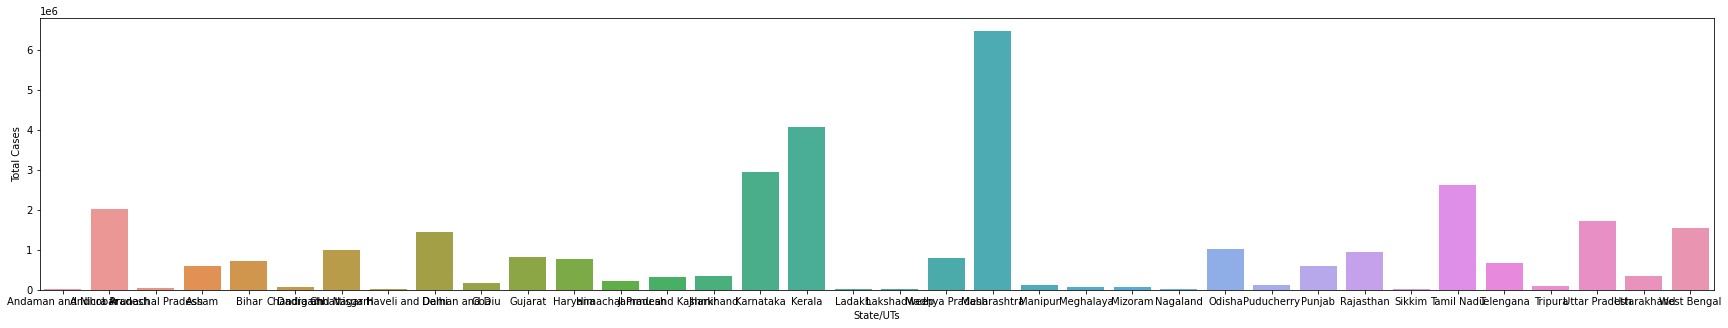

In [5]:
plt.figure(figsize = (30,5))
sns.barplot(data = covid_data, x = 'State/UTs', y = 'Total Cases')

In [6]:
covid_data.sort_values(by = 'Active',ascending=False).head()  #top-5 states/uts with Highest Active cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,4057233,219441,3817004,20788,5.41,94.08,0.51
20,Maharashtra,6464876,54763,6272800,137313,0.85,97.03,2.12
15,Karnataka,2949445,18412,2893715,37318,0.62,98.11,1.27
30,Tamil Nadu,2614872,16850,2563101,34921,0.64,98.02,1.34
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69


In [7]:
covid_data.sort_values(by = 'Active').head()  #top-5 states/uts with Lowest Active cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Dadra and Nagar Haveli and Daman and Diu,10663,4,10655,4,0.04,99.92,0.04
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
18,Lakshadweep,10347,31,10265,51,0.30,99.21,0.49
5,Chandigarh,65105,40,64252,813,0.06,98.69,1.25
17,Ladakh,20560,69,20284,207,0.34,98.66,1.01


In [8]:
covid_data.sort_values(by = 'Deaths',ascending=False).head()  #top-5 states/uts with Highest deaths

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6464876,54763,6272800,137313,0.85,97.03,2.12
15,Karnataka,2949445,18412,2893715,37318,0.62,98.11,1.27
30,Tamil Nadu,2614872,16850,2563101,34921,0.64,98.02,1.34
8,Delhi,1437764,349,1412333,25082,0.02,98.23,1.74
33,Uttar Pradesh,1709335,256,1686256,22823,0.01,98.65,1.34


In [9]:
covid_data.sort_values(by = 'Discharge Ratio (%)',ascending=False).head()  #top-5 states/uts with Highest Discharge Ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Dadra and Nagar Haveli and Daman and Diu,10663,4,10655,4,0.04,99.92,0.04
18,Lakshadweep,10347,31,10265,51,0.30,99.21,0.49
28,Rajasthan,954095,97,945044,8954,0.01,99.05,0.94
10,Gujarat,825422,150,815191,10081,0.02,98.76,1.22
5,Chandigarh,65105,40,64252,813,0.06,98.69,1.25


In [10]:
covid_data.sort_values(by = 'Death Ratio (%)').head()  #top-5 states/uts with lowest Death Ratio.

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Dadra and Nagar Haveli and Daman and Diu,10663,4,10655,4,0.04,99.92,0.04
23,Mizoram,59119,8885,50017,217,15.03,84.60,0.37
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
18,Lakshadweep,10347,31,10265,51,0.30,99.21,0.49
16,Kerala,4057233,219441,3817004,20788,5.41,94.08,0.51


In [11]:
covid_data.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.611215,0.999838,0.900046,-0.027254,0.008484,0.089691
Active,0.611215,1.000000,0.597580,0.303463,0.282188,-0.251663,-0.190999
Discharged,0.999838,0.597580,1.000000,0.903537,-0.034539,0.015363,0.092881
Deaths,0.900046,0.303463,0.903537,1.000000,-0.096621,0.035855,0.293068
Active Ratio (%),-0.027254,0.282188,-0.034539,-0.096621,1.000000,-0.977407,-0.288829
Discharge Ratio (%),0.008484,-0.251663,0.015363,0.035855,-0.977407,1.000000,0.079953
Death Ratio (%),0.089691,-0.190999,0.092881,0.293068,-0.288829,0.079953,1.000000


<AxesSubplot:>

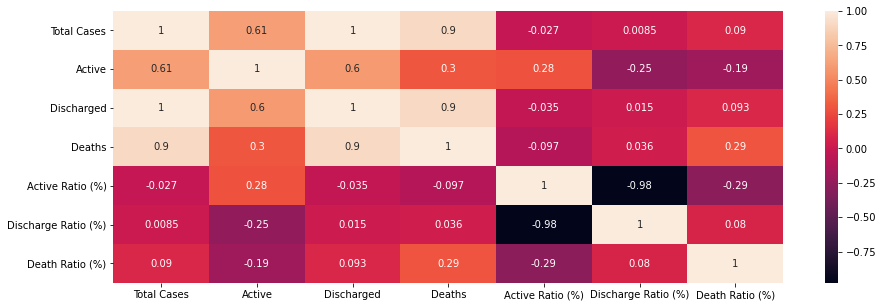

In [12]:
plt.figure(figsize = (15,5))

sns.heatmap(data = covid_data.corr(),annot = True)